<b><h1 style="text-align:center ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F"> World Cup 2022 Data Analysis </h1></b>

![world-cup](images/fifa22.jpg)

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
from chart_studio import plotly as py
import plotly.express as px

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Data Preparation :</h3></b>

In [87]:
FIFA22 = pd.read_csv('players_22.csv', low_memory=False)
FIFA22.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [92]:
interesting_columns = [
    'short_name', 
    'age',  
    'nationality_name', 
    'overall', 
    'potential', 
    'club_name', 
    'value_eur', 
    'wage_eur', 
    'player_positions'
]
FIFA22 = pd.DataFrame(FIFA22, columns=interesting_columns)

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Summarize Data :</h3></b>

In [93]:
FIFA22.head(20)

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"
5,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,GK
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,"ST, LW"
7,M. Neuer,35,Germany,90,90,FC Bayern München,13500000.0,86000.0,GK
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST


In [95]:
FIFA22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   age               19239 non-null  int64  
 2   nationality_name  19239 non-null  object 
 3   overall           19239 non-null  int64  
 4   potential         19239 non-null  int64  
 5   club_name         19178 non-null  object 
 6   value_eur         19165 non-null  float64
 7   wage_eur          19178 non-null  float64
 8   player_positions  19239 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ MB


<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Preprocess Data :</h3></b>

<p style="font-family: 'Times New Roman'; text-align:justify">To make things simpler, I select the first position from list as preferred and save it in 'Position' column.</p>

In [99]:
FIFA22['Position'] = FIFA22['player_positions'].str.split(",").str[0]

In [100]:
FIFA22.head(20)

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions,Position
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF",RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW",ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM",LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM",CM
5,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,GK,GK
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,"ST, LW",ST
7,M. Neuer,35,Germany,90,90,FC Bayern München,13500000.0,86000.0,GK,GK
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK,GK
9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST,ST


<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Data Visualization :</h3></b>

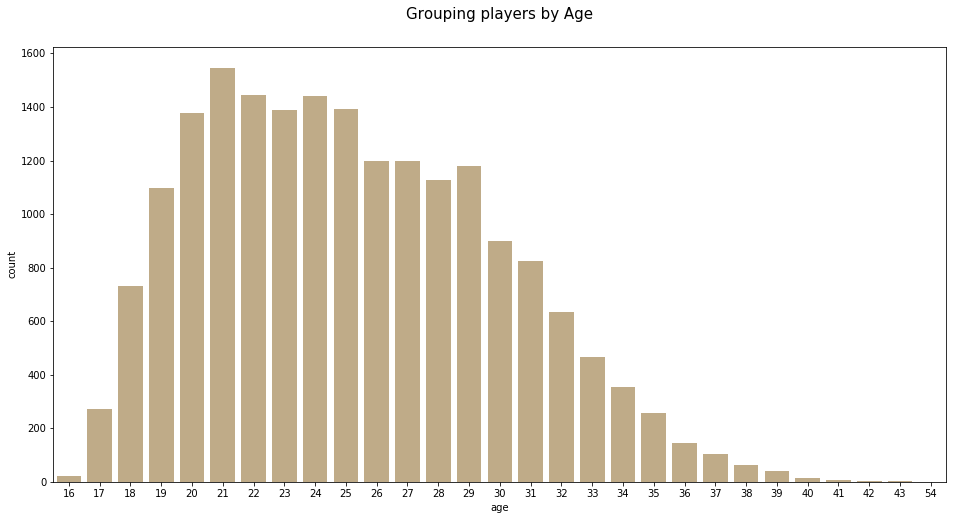

In [101]:
plt.figure(figsize=(16,8))
plt.title('Grouping players by Age', fontsize=15, y=1.05,)
sns.countplot(x="age", data=FIFA22,color="#c8ad7f")
plt.show()

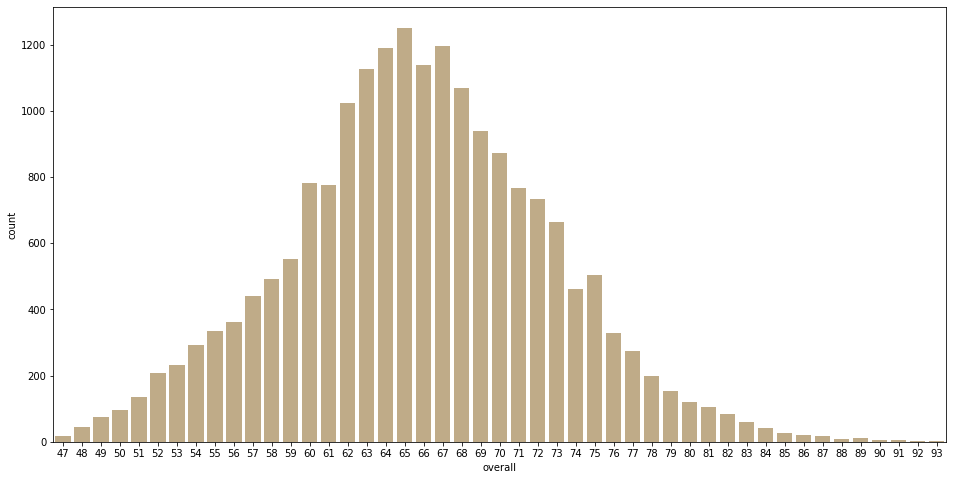

In [102]:
plt.figure(figsize=(16,8))
sns.countplot(x="overall", data=FIFA22,color="#c8ad7f")
plt.show()

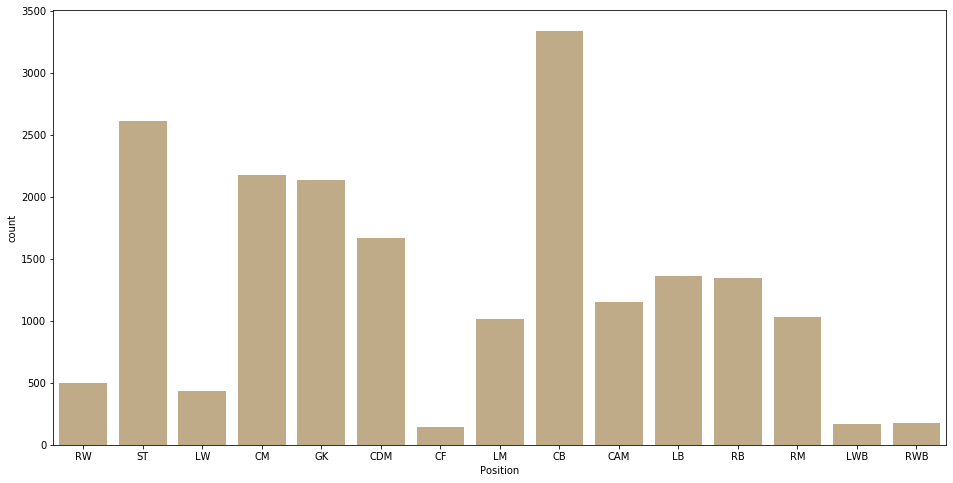

In [103]:
plt.figure(figsize=(16,8))
sns.countplot(x="Position", data=FIFA22,color="#c8ad7f")
plt.show()

In [108]:
# Grouping the data by countries
valcon = FIFA22.groupby("nationality_name").size().reset_index(name="Count")
valcon.head(10)

,nationality_name,Count
0,Afghanistan,1
1,Albania,46
2,Algeria,51
3,Andorra,1
4,Angola,17
5,Antigua and Barbuda,3
6,Argentina,960
7,Armenia,7
8,Australia,266
9,Austria,319


In [109]:
sorted_players = FIFA22.sort_values(["value_eur"], ascending=False).head(20)
players = sorted_players[["short_name" ,"age" ,"nationality_name" ,"club_name" ,"Position" ,"value_eur"]].values

In [110]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Value
K. Mbappé,22,France,Paris Saint-Germain,ST,194000000.0
E. Haaland,20,Norway,Borussia Dortmund,ST,137500000.0
H. Kane,27,England,Tottenham Hotspur,ST,129500000.0
Neymar Jr,29,Brazil,Paris Saint-Germain,LW,129000000.0
K. De Bruyne,30,Belgium,Manchester City,CM,125500000.0
R. Lewandowski,32,Poland,FC Bayern München,ST,119500000.0
F. de Jong,24,Netherlands,FC Barcelona,CM,119500000.0
G. Donnarumma,22,Italy,Paris Saint-Germain,GK,119500000.0
J. Sancho,21,England,Manchester United,RM,116500000.0
T. Alexander-Arnold,22,England,Liverpool,RB,114000000.0


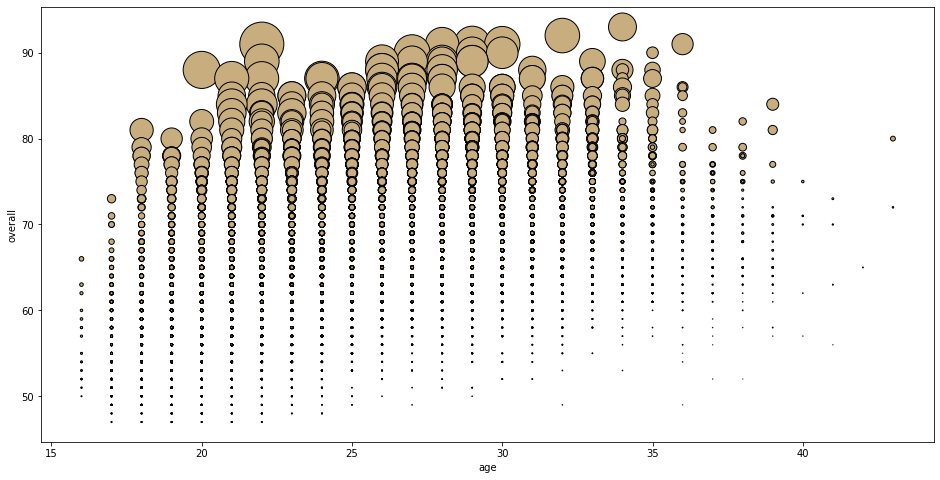

In [116]:
plt.figure(figsize=(16,8))
plt.xlabel('age', fontsize=10)
plt.ylabel('overall', fontsize=10)

age = FIFA22["age"].values
overall = FIFA22["overall"].values
value = FIFA22["value_eur"].values

plt.scatter(age, overall,s = value/100000, edgecolors='black',color="#c8ad7f")
plt.show()


In [117]:
sorted_players = FIFA22.sort_values(["wage_eur"], ascending=False).head(20)
players = sorted_players[["short_name" ,"age" ,"nationality_name" ,"club_name" ,"Position" ,"wage_eur"]].values

In [118]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Wage
K. De Bruyne,30,Belgium,Manchester City,CM,350000.0
K. Benzema,33,France,Real Madrid CF,CF,350000.0
L. Messi,34,Argentina,Paris Saint-Germain,RW,320000.0
Casemiro,29,Brazil,Real Madrid CF,CDM,310000.0
T. Kroos,31,Germany,Real Madrid CF,CM,310000.0
R. Sterling,26,England,Manchester City,LW,290000.0
Cristiano Ronaldo,36,Portugal,Manchester United,ST,270000.0
Neymar Jr,29,Brazil,Paris Saint-Germain,LW,270000.0
R. Lewandowski,32,Poland,FC Bayern München,ST,270000.0
M. Salah,29,Egypt,Liverpool,RW,270000.0


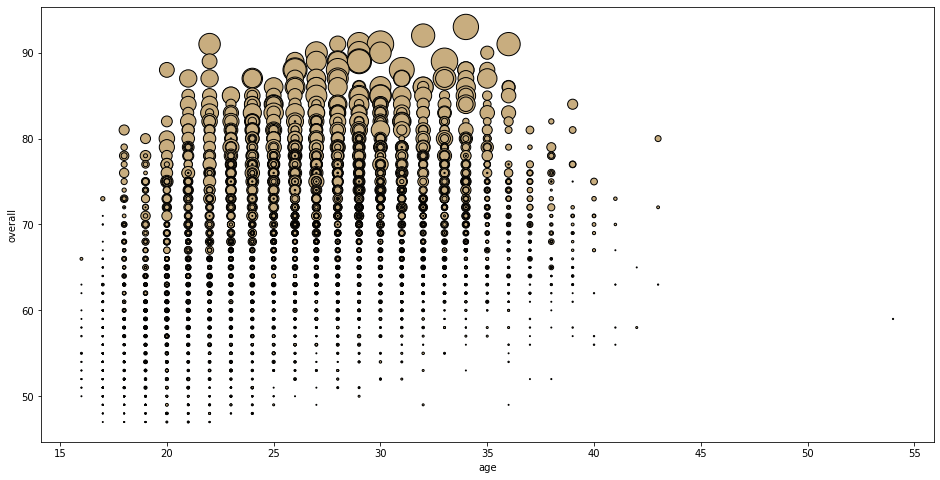

In [119]:
plt.figure(figsize=(16,8))
plt.xlabel('age', fontsize=10)
plt.ylabel('overall', fontsize=10)
age = FIFA22["age"].values
overall = FIFA22["overall"].values
value = FIFA22["wage_eur"].values
plt.scatter(age, overall, s = value/500, edgecolors='black',color="#c8ad7f")
plt.show()

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Best Squad Analysis :</h3></b>

In [120]:
FIFA22 = FIFA22[["short_name" ,"age" ,"nationality_name" ,'overall', 'potential',"club_name" ,"Position" ,"value_eur","wage_eur"]]
FIFA22.head(10)

,short_name,age,nationality_name,overall,potential,club_name,Position,value_eur,wage_eur
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,RW,78000000.0,320000.0
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,ST,119500000.0,270000.0
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,ST,45000000.0,270000.0
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,LW,129000000.0,270000.0
4,K. De Bruyne,30,Belgium,91,91,Manchester City,CM,125500000.0,350000.0
5,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,GK,112000000.0,130000.0
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,ST,194000000.0,230000.0
7,M. Neuer,35,Germany,90,90,FC Bayern München,GK,13500000.0,86000.0
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,GK,99000000.0,250000.0
9,H. Kane,27,England,90,90,Tottenham Hotspur,ST,129500000.0,240000.0


<b><h4 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" > Squad of Highest Overall Players</h4></b>

In [160]:
def get_best_squad(formation):
    FIFA22_copy = FIFA22.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['short_name'].to_string(index = False),
            FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['club_name'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['value_eur'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['wage_eur'].to_string(index = False)
        ])
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax(), 
                         inplace = True)
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'short_name', 'overall', 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [208]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position          short_name overall age           club_name   value_eur wage_eur
      GK            J. Oblak      91  28  Atlético de Madrid 112000000.0 130000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB        A. Robertson      87  27           Liverpool  83500000.0 175000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
      RW            L. Messi      93  34 Paris Saint-Germain  78000000.0 320000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      LW           Neymar Jr      91  29 Paris Saint-Germain 129000000.0 270000.0


In [163]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position          short_name overall age           club_name   value_eur wage_eur
      GK            J. Oblak      91  28  Atlético de Madrid 112000000.0 130000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB        A. Robertson      87  27           Liverpool  83500000.0 175000.0
      RM           J. Sancho      87  21   Manchester United 116500000.0 150000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
      CM            T. Kroos      88  31      Real Madrid CF  75000000.0 310000.0
      LM              H. Son      89  28   Tottenham Hotspur 104000000.0 220000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      ST   Cristiano Ronaldo      91  36   Manchester United  45000000.0 270000.0


In [164]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position          short_name overall age           club_name   value_eur wage_eur
      GK            J. Oblak      91  28  Atlético de Madrid 112000000.0 130000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB        A. Robertson      87  27           Liverpool  83500000.0 175000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
     CDM            Casemiro      89  29      Real Madrid CF  88000000.0 310000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
     CAM           T. Müller      87  31   FC Bayern München  66000000.0 140000.0
     CAM      Bernardo Silva      86  26     Manchester City  80000000.0 200000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0


In [215]:
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    FIFA22_copy = FIFA22.copy()
    FIFA22_copy = FIFA22_copy[FIFA22_copy['nationality_name'] == nationality]
    store = []
    for i in formation:
        store.append([
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), 
            FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])    
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax(),inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),columns = ['Position', 'short_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [216]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    return summary

In [217]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [218]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >France :</h3></b>

In [227]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = False)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)
France

,Nationality,Squad,Overall,Potential
0,France,3-4-3,85.55,89.18
1,France,4-4-2,85.73,88.73
2,France,4-3-1-2,86.09,88.91
3,France,4-3-3,85.64,89.09
4,France,4-2-3-1,85.64,89.09


In [229]:
rating_4312_FR_Overall, best_list_4312_FR_Overall = get_best_squad_n(squad_4312_strict, 'France', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_FR_Overall))
print(best_list_4312_FR_Overall)
#------------------------------------------------------------------------------------------------------------
rating_343_FR_Potential, best_list_343_FR_Potential = get_best_squad_n(squad_343_strict, 'France', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_343_FR_Potential))
print(best_list_343_FR_Potential)

-Overall-
Average rating: 86.1
Position   short_name overall age           club_name   value_eur wage_eur
      GK    H. Lloris      87  34   Tottenham Hotspur  13500000.0 125000.0
     RWB   N. Mukiele      81  23          RB Leipzig  34500000.0  65000.0
      CB    R. Varane      86  28   Manchester United  68500000.0 180000.0
      CB  P. Kimpembe      83  25 Paris Saint-Germain  45500000.0  90000.0
      LB     L. Digne      84  27             Everton  40500000.0 110000.0
     CDM     N. Kanté      90  30             Chelsea 100000000.0 230000.0
      CM     P. Pogba      87  28   Manchester United  79500000.0 220000.0
     CAM     N. Fekir      84  27 Real Betis Balompié  45000000.0  42000.0
      CF   K. Benzema      89  33      Real Madrid CF  66000000.0 350000.0
      ST    K. Mbappé      91  22 Paris Saint-Germain 194000000.0 230000.0
      ST A. Griezmann      85  30  Atlético de Madrid  53000000.0 220000.0
-Potential-
Average rating: 89.2
Position   short_name potential age 

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Germany :</h3></b>

In [241]:
Germany  = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Germany.set_index('nationality_name', inplace = False)
Germany[['overall', 'potential']] = Germany[['overall', 'potential']].astype(float)
Germany 

,nationality_name,Squad,overall,potential
0,Germany,3-4-3,83.73,86.55
1,Germany,4-4-2,83.64,86.64
2,Germany,4-3-1-2,85.00,87.55
3,Germany,4-3-3,84.09,87.27
4,Germany,4-2-3-1,84.09,87.18


In [242]:
rating_4312_GER_Overall, best_list_4312_GER_Overall = get_best_squad_n(squad_4312_strict, 'Germany', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_GER_Overall))
print(best_list_4312_GER_Overall)
#------------------------------------------------------------------------------------------------------------
rating_4312_GER_Potential, best_list_4312_GER_Potential = get_best_squad_n(squad_4312_strict, 'Germany', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_GER_Potential))
print(best_list_4312_GER_Potential)

-Overall-
Average rating: 85.0
Position  short_name overall age                club_name   value_eur wage_eur
      GK    M. Neuer      90  35        FC Bayern München  13500000.0  86000.0
     RWB D. da Costa      76  27      Eintracht Frankfurt   7000000.0  25000.0
      CB  M. Hummels      86  32        Borussia Dortmund  44000000.0  95000.0
      CB   M. Ginter      84  27 Borussia Mönchengladbach  42500000.0  45000.0
     LWB   R. Gosens      83  26                 Atalanta  36000000.0  65000.0
     CDM  J. Kimmich      89  26        FC Bayern München 108000000.0 160000.0
      CM    T. Kroos      88  31           Real Madrid CF  75000000.0 310000.0
     CAM   T. Müller      87  31        FC Bayern München  66000000.0 140000.0
     CAM     M. Reus      85  32        Borussia Dortmund  43000000.0  95000.0
      ST   T. Werner      84  25                  Chelsea  56500000.0 155000.0
      ST  K. Volland      83  28                AS Monaco  37000000.0  83000.0
-Potential-
Average r

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Spain :</h3></b>

In [243]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Spain.set_index('nationality_name', inplace = False)
Spain[['overall', 'potential']] = Spain[['overall', 'potential']].astype(float)
Spain 

,nationality_name,Squad,overall,potential
0,Spain,3-4-3,85.36,88.27
1,Spain,4-4-2,84.82,87.09
2,Spain,4-3-1-2,85.64,87.55
3,Spain,4-3-3,85.55,88.36
4,Spain,4-2-3-1,85.45,88.18


In [244]:
rating_4312_GER_Overall, best_list_4312_GER_Overall = get_best_squad_n(squad_4312_strict, 'Spain', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_GER_Overall))
print(best_list_4312_GER_Overall)
#------------------------------------------------------------------------------------------------------------
rating_433_GER_Potential, best_list_433_GER_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_GER_Potential))
print(best_list_433_GER_Potential)

-Overall-
Average rating: 85.6
Position      short_name overall age           club_name  value_eur wage_eur
      GK          De Gea      84  30   Manchester United 28000000.0 120000.0
      RB        Carvajal      85  29      Real Madrid CF 47500000.0 210000.0
      CB    Sergio Ramos      88  35 Paris Saint-Germain 24000000.0 115000.0
      CB      A. Laporte      86  27     Manchester City 77000000.0 185000.0
      LB      Jordi Alba      86  32        FC Barcelona 47000000.0 200000.0
      CM          Thiago      86  30           Liverpool 65000000.0 180000.0
     CDM Sergio Busquets      86  32        FC Barcelona 45000000.0 200000.0
      CM          Parejo      86  32       Villarreal CF 53500000.0  64000.0
     CAM     David Silva      85  35       Real Sociedad 22000000.0  44000.0
      ST   Gerard Moreno      86  29       Villarreal CF 68000000.0  73000.0
      ST      Iago Aspas      84  33    RC Celta de Vigo 27000000.0  46000.0
-Potential-
Average rating: 88.4
Position    

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >England :</h3></b>

In [240]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
England.set_index('nationality_name', inplace = False)
England[['overall', 'potential']] = England[['overall', 'potential']].astype(float)
England

,nationality_name,Squad,overall,potential
0,England,3-4-3,84.91,88.27
1,England,4-4-2,85.18,88.73
2,England,4-3-1-2,84.55,88.27
3,England,4-3-3,85.18,89.00
4,England,4-2-3-1,85.09,88.82


In [245]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

rating_433_ENG_Potential, best_list_433_ENG_Potential = get_best_squad_n(squad_433_strict, 'England', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Potential))
print(best_list_433_ENG_Potential)

-Overall-
Average rating: 85.2
Position          short_name overall age         club_name   value_eur wage_eur
      GK             N. Pope      83  29           Burnley  25000000.0  45000.0
      RB T. Alexander-Arnold      87  22         Liverpool 114000000.0 150000.0
      CB          H. Maguire      84  28 Manchester United  42500000.0 155000.0
      CB           J. Stones      83  27   Manchester City  41000000.0 140000.0
      LB             L. Shaw      84  25 Manchester United  48500000.0 140000.0
     CDM        J. Henderson      84  31         Liverpool  29500000.0 140000.0
     CAM            P. Foden      84  21   Manchester City  94500000.0 125000.0
     CAM            M. Mount      83  22           Chelsea  58500000.0 120000.0
      RM           J. Sancho      87  21 Manchester United 116500000.0 150000.0
      ST             H. Kane      90  27 Tottenham Hotspur 129500000.0 240000.0
      LW         R. Sterling      88  26   Manchester City 107500000.0 290000.0
-Potentia

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Brazil :</h3></b>

In [247]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Brazil.set_index('nationality_name', inplace = False)
Brazil[['overall', 'potential']] = Brazil[['overall', 'potential']].astype(float)
Brazil

,nationality_name,Squad,overall,potential
0,Brazil,3-4-3,85.64,88.00
1,Brazil,4-4-2,84.27,87.64
2,Brazil,4-3-1-2,84.91,87.55
3,Brazil,4-3-3,85.64,88.09
4,Brazil,4-2-3-1,85.55,88.09


In [248]:
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Overall-
Average rating: 85.6
Position      short_name overall age           club_name   value_eur wage_eur
      GK         Ederson      89  27     Manchester City  94000000.0 200000.0
      RB          Danilo      81  29            Juventus  22500000.0  83000.0
      CB      Marquinhos      87  27 Paris Saint-Germain  90500000.0 135000.0
      CB    Thiago Silva      85  36             Chelsea   9500000.0 105000.0
      LB     Alex Sandro      83  30            Juventus  31500000.0  95000.0
     CDM        Casemiro      89  29      Real Madrid CF  88000000.0 310000.0
     CDM         Fabinho      86  27           Liverpool  73500000.0 165000.0
     CDM        Fernando      84  33          Sevilla FC  21000000.0  43000.0
      RM        Raphinha      82  24        Leeds United  46000000.0  89000.0
      CF Roberto Firmino      85  29           Liverpool  54000000.0 185000.0
      LW       Neymar Jr      91  29 Paris Saint-Germain 129000000.0 270000.0
-Potential-
Average rating: 88.1


<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Argentina :</h3></b>

In [249]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Argentina.set_index('nationality_name', inplace = False)
Argentina[['overall', 'potential']] = Argentina[['overall', 'potential']].astype(float)
Argentina

,nationality_name,Squad,overall,potential
0,Argentina,3-4-3,83.18,86.00
1,Argentina,4-4-2,82.45,85.64
2,Argentina,4-3-1-2,83.36,85.91
3,Argentina,4-3-3,83.73,86.18
4,Argentina,4-2-3-1,83.73,86.09


In [250]:
rating_433_ARG_Overall, best_list_433_ARG_Overall = get_best_squad_n(squad_433_strict, 'Argentina', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Overall))
print(best_list_433_ARG_Overall)

rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Overall-
Average rating: 83.7
Position  short_name overall age           club_name  value_eur wage_eur
      GK E. Martínez      84  28         Aston Villa 33500000.0  81000.0
      RB  G. Montiel      78  24          Sevilla FC 21000000.0  23000.0
      CB   C. Romero      82  23   Tottenham Hotspur 41500000.0  51000.0
      CB N. Otamendi      81  33          SL Benfica 12500000.0  18000.0
      LB    M. Acuña      84  29          Sevilla FC 37000000.0  45000.0
     CDM   É. Banega      82  33           Al Shabab 15000000.0  46000.0
     CAM    A. Gómez      85  33          Sevilla FC 33500000.0  51000.0
      CM  R. De Paul      82  27  Atlético de Madrid 35000000.0  68000.0
      RW    L. Messi      93  34 Paris Saint-Germain 78000000.0 320000.0
      ST   S. Agüero      87  33        FC Barcelona 51000000.0 260000.0
      LW  L. Ocampos      83  26          Sevilla FC 39500000.0  46000.0
-Potential-
Average rating: 86.2
Position  short_name potential age                   club_na

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Belgium :</h3></b>

In [251]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Belgium.set_index('nationality_name', inplace = False)
Belgium[['overall', 'potential']] = Belgium[['overall', 'potential']].astype(float)
Belgium

,nationality_name,Squad,overall,potential
0,Belgium,3-4-3,83.18,85.27
1,Belgium,4-4-2,83.00,84.91
2,Belgium,4-3-1-2,82.91,84.82
3,Belgium,4-3-3,83.45,85.55
4,Belgium,4-2-3-1,83.18,85.36


In [252]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Overall-
Average rating: 83.5
Position      short_name overall age            club_name   value_eur wage_eur
      GK     T. Courtois      89  29       Real Madrid CF  85500000.0 250000.0
      RB     T. Castagne      79  25       Leicester City  21500000.0  84000.0
      CB T. Alderweireld      83  32                  NaN         NaN      NaN
      CB   J. Vertonghen      81  34           SL Benfica   8500000.0  18000.0
     LWB      J. Kayembe      74  26 Royal Charleroi S.C.   4500000.0  13000.0
      CM    K. De Bruyne      91  30      Manchester City 125500000.0 350000.0
      CM    Y. Tielemans      84  24       Leicester City  57000000.0 125000.0
     CDM       A. Witsel      83  32    Borussia Dortmund  24000000.0  72000.0
      RW      A. Januzaj      81  26        Real Sociedad  28000000.0  45000.0
      ST       R. Lukaku      88  28              Chelsea  93500000.0 260000.0
      LW       E. Hazard      85  30       Real Madrid CF  52000000.0 240000.0
-Potential-
Average r

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Portugal :</h3></b>

In [253]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Portugal.set_index('nationality_name', inplace = False)
Portugal[['overall', 'potential']] = Portugal[['overall', 'potential']].astype(float)
Portugal

,nationality_name,Squad,overall,potential
0,Portugal,3-4-3,83.73,87.36
1,Portugal,4-4-2,84.45,87.91
2,Portugal,4-3-1-2,85.00,88.00
3,Portugal,4-3-3,84.73,87.82
4,Portugal,4-2-3-1,84.36,87.82


In [259]:
rating_4312_POR_Overall, best_list_4312_POR_Overall = get_best_squad_n(squad_4312_strict, 'Portugal', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_POR_Overall))
print(best_list_4312_POR_Overall)

rating_4312_POR_Potential, best_list_4312_POR_Potential = get_best_squad_n(squad_4312_strict, 'Portugal', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_POR_Potential))
print(best_list_4312_POR_Potential)

-Overall-
Average rating: 85.0
Position        short_name overall age               club_name   value_eur wage_eur
      GK      Rui Patrício      82  33                    Roma  10000000.0  51000.0
      RB      João Cancelo      86  27         Manchester City  71500000.0 185000.0
      CB        Rúben Dias      87  24         Manchester City 102500000.0 170000.0
      CB              Pepe      82  38                FC Porto   5500000.0  14000.0
      LB      R. Guerreiro      84  27       Borussia Dortmund  40500000.0  79000.0
      CM       Rúben Neves      82  24 Wolverhampton Wanderers  46000000.0  89000.0
     CAM   Bruno Fernandes      88  26       Manchester United 107500000.0 250000.0
     CAM    Bernardo Silva      86  26         Manchester City  80000000.0 200000.0
      CF        João Félix      83  21      Atlético de Madrid  82000000.0  61000.0
      ST Cristiano Ronaldo      91  36       Manchester United  45000000.0 270000.0
      ST       André Silva      84  25       

<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Croatia :</h3></b>

In [260]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Croatia.set_index('nationality_name', inplace = False)
Croatia[['overall', 'potential']] = Croatia[['overall', 'potential']].astype(float)
Croatia

,nationality_name,Squad,overall,potential
0,Croatia,3-4-3,79.55,84.09
1,Croatia,4-4-2,79.73,83.27
2,Croatia,4-3-1-2,80.91,84.27
3,Croatia,4-3-3,80.27,84.36
4,Croatia,4-2-3-1,80.00,84.36


In [261]:
rating_4312_CRO_Overall, best_list_4312_CRO_Overall = get_best_squad_n(squad_4312_strict, 'Croatia', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_CRO_Overall))
print(best_list_4312_CRO_Overall)

rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Croatia', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

-Overall-
Average rating: 80.9
Position    short_name overall age              club_name  value_eur wage_eur
      GK  D. Livaković      82  26          Dinamo Zagreb 35000000.0   1000.0
      RB   Š. Vrsaljko      80  29     Atlético de Madrid 18500000.0  56000.0
      CB       D. Vida      78  32            Beşiktaş JK  9000000.0  42000.0
      CB D. Ćaleta-Car      78  24 Olympique de Marseille 19000000.0  31000.0
     LWB       B. Sosa      77  23          VfB Stuttgart 15000000.0  23000.0
      CM     L. Modrić      87  35         Real Madrid CF 32000000.0 190000.0
     CDM   M. Brozović      84  28                  Inter 37000000.0 130000.0
      CM    M. Kovačić      83  27                Chelsea 41500000.0 135000.0
     CAM     N. Vlašić      80  23        West Ham United 33500000.0  66000.0
      ST   A. Kramarić      83  30         TSG Hoffenheim 35500000.0  59000.0
      ST    A. Budimir      78  29             CA Osasuna 14000000.0  34000.0
-Potential-
Average rating: 84.4


<b><h3 style="text-align:left ;  font-family: 'Times New Roman', Times, serif ; color: #C8AD7F" >Morocco :</h3></b>

In [262]:
Morocco = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Morocco'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Morocco.set_index('nationality_name', inplace = False)
Morocco[['overall', 'potential']] = Morocco[['overall', 'potential']].astype(float)
Morocco

,nationality_name,Squad,overall,potential
0,Morocco,3-4-3,79.73,81.36
1,Morocco,4-4-2,78.45,81.00
2,Morocco,4-3-1-2,78.73,80.82
3,Morocco,4-3-3,79.55,81.45
4,Morocco,4-2-3-1,79.55,81.45


In [264]:
rating_343_CRO_Overall, best_list_343_CRO_Overall = get_best_squad_n(squad_343_strict, 'Morocco', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_CRO_Overall))
print(best_list_343_CRO_Overall)

rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Morocco', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

-Overall-
Average rating: 79.7
Position   short_name overall age               club_name  value_eur wage_eur
      GK    Y. Bounou      82  30              Sevilla FC 20500000.0  29000.0
      CB   M. Benatia      80  34   Fatih Karagümrük S.K.  7000000.0  19000.0
      CB    Z. Feddal      80  31             Sporting CP 14500000.0  17000.0
      CB     R. Saïss      78  31 Wolverhampton Wanderers  9500000.0  69000.0
      RB    A. Hakimi      85  22     Paris Saint-Germain 69500000.0 100000.0
      CM   A. Taarabt      77  32              SL Benfica  8500000.0  15000.0
      CM      F. Fajr      76  32    Demir Grup Sivasspor  6000000.0  19000.0
      LB    A. Masina      74  27                 Watford  4400000.0  39000.0
      RW    H. Ziyech      84  28                 Chelsea 42500000.0 170000.0
      ST Y. En-Nesyri      82  24              Sevilla FC 44000000.0  37000.0
      LW        Munir      79  25              Sevilla FC 21000000.0  33000.0
-Potential-
Average rating: 81.5


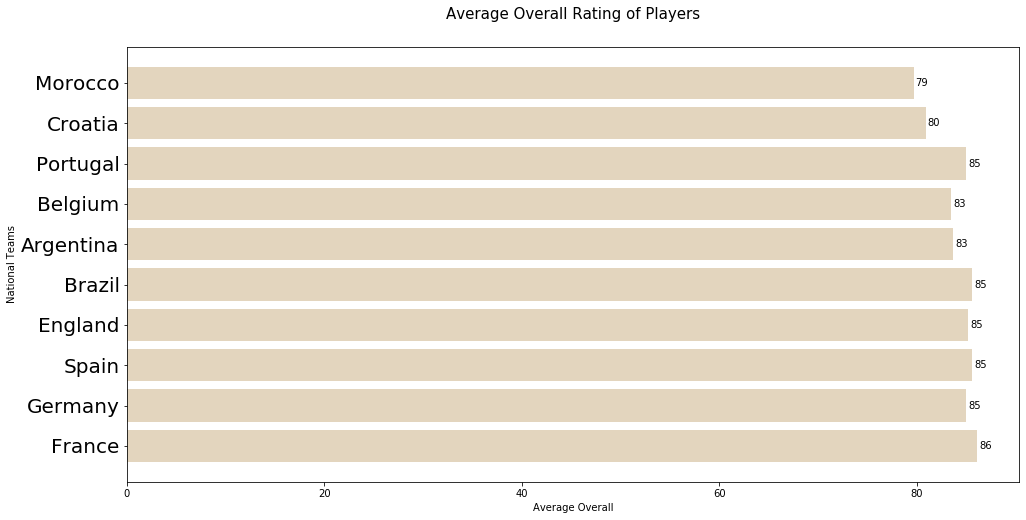

In [293]:
teams = ('France', 'Germany', 'Spain', 'England', 'Brazil', 'Argentina', 'Belgium', 'Portugal', 'Croatia','Morocco')
index = np.arange(len(teams))
average_overall = [86.1, 85.0, 85.6, 85.2, 85.6, 83.7, 83.5, 85.0, 80.9,79.7]
plt.figure(figsize=(16,8))
plots = plt.barh(index, average_overall ,align='center', alpha=0.5 , color= '#c8ad7f',label =index)

# Iterrating over the bars one-by-one
for rect in plots.patches:
        width = rect.get_width()
        plt.text(1.01*rect.get_width(), rect.get_y()+0.5*rect.get_height(),'%d' % width, ha='center', va='center')

plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=10)
plt.xlabel('Average Overall', fontsize=10)
plt.title('Average Overall Rating of Players', fontsize=15, y=1.05,)
plt.show()